# Homework 5 - Devin Lim, Duong Le, Lakshit Gupta, Ponnu Soman

## Activity 1

> Identify a data set that you will be using. Provide a link to the data set. 
Describe anything in the data that will need to be cleaned up or modified in some way before you will be able to make graphs from it. 
What additional information could be useful to supplement this data set? Describe at least three variables beyond what is included in the data set that could be valuable to find and merge with this data. 

For our project, we want to visualize the impacts that COVID-19 have on the mortality rate, incidence rate, or prevalence of other diseases, such as cancer, heart diseases, respiratory diseases, etc. 

For this homework, we've chosen the "Underlying Cause of Death, 2018-2022, Single Race" dataset to explore deaths and population counts in the US during 2018 to 2022. This is the link to the dataset: https://wonder.cdc.gov/ucd-icd10-expanded.html. With this dataset, we were able to do some amount of data cleaning and preprocessing, including filtering unused columns and removing missing values. We also made sure that the columns included are of the correct data types (categories, strings, integers, floats) to aid in creating the visualizations. 

To supplement the above dataset, we'd like to merge it with the "US 2023 Chronic Disease Indicator" dataset, which includes yearly data on a variety of other diseases such as the mortality rate, incidence rate, or prevalence of various cancers, cardiovascular diseases, and diabetes. This is the link to the dataset: https://data.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-CDI-2023-Release/g4ie-h725/about_data

With the new dataset, we aim to use historical data of the other diseases pre-2020 to generate a predicted baseline of the mortality rate, incidence rate, or prevalence of the selected diseases post-2020. We will then compare it with the actual mortality rate, incidence rate, or prevalence to see whether there are significant discrepencacies that can't be explained by random chance. 

Additionally, if time permits, we can also incorporate demographic variables such as age, gender, race for further analysis.

## Activity 2

> Each member of the group should make a graph looking at something from the data set. Include these graphs, and label who created each graph. For the moment, this is completely open-ended. We're not trying to do anything specific yet, just starting to get used to loading this data into R and working with it.

In [1]:
import chardet
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
underlying_cause_of_death = "../datasets/raw/Underlying_Cause_of_Death_2022.csv"
underlying_cause_of_death_cols = [
    "Year",
    "Cause of death",
    "Cause of death Code",
    "Deaths",
    "Population",
    "Crude Rate",
]
underlying_cause_of_death_dtype = {
    # capital I or capital F for nullable types
    "Year": "category",
    "Cause of death": "category",
    "Cause of death Code": "category",
    "Deaths": "Int32",
    "Population": "Int32",
    "Crude Rate": "Float32",
}

# somehow it's not UTF-8 encoded
with open(underlying_cause_of_death, "rb") as file:
    raw = file.read()
    encoding = chardet.detect(raw)["encoding"]

df = pd.read_csv(
    underlying_cause_of_death,
    encoding=encoding,
    usecols=underlying_cause_of_death_cols,
    dtype=underlying_cause_of_death_dtype,
    na_values=["Unreliable"],
)

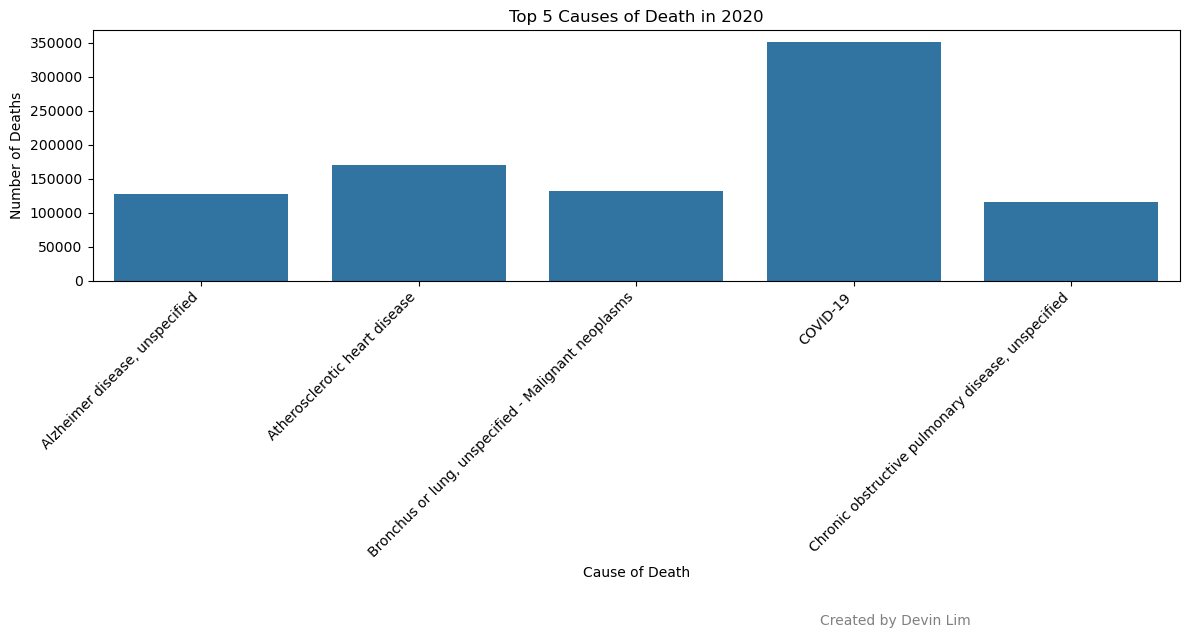

In [3]:
top_5_causes_2020 = (
    df[df["Year"] == "2020"]
    .groupby("Cause of death", observed=True)["Deaths"]
    .sum()
    .reset_index()
    .sort_values("Deaths", ascending=False)
    .head(5)
)

top_5_causes_2020["Cause of death"] = top_5_causes_2020[
    "Cause of death"
].cat.remove_unused_categories()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_5_causes_2020,
    x="Cause of death",
    y="Deaths",
)
plt.title("Top 5 Causes of Death in 2020")
plt.xlabel("Cause of Death")
plt.ylabel("Number of Deaths")
plt.xticks(rotation=45, ha="right")
plt.figtext(0.75, -0.05, "Created by Devin Lim", ha="center", fontsize=10, color="gray")
plt.tight_layout()
plt.show()

/var/folders/_d/ncq1_ycx743dwrbgqss9z7hr0000gn/T/ipykernel_50984/658246195.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_heart.groupby("Year")["Crude Rate"].mean().reset_index()


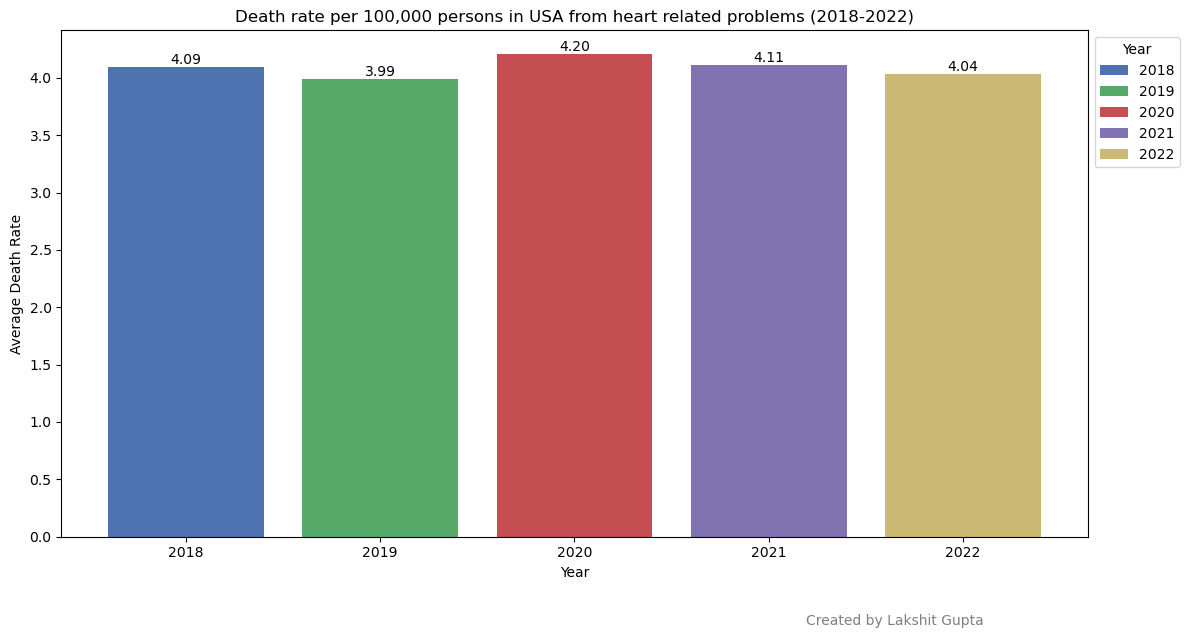

In [4]:
data_heart = df[df["Cause of death"].str.contains("heart", case=False, na=False)]
data_heart.loc[:, "Crude Rate"] = pd.to_numeric(
    data_heart["Crude Rate"], errors="coerce"
)

average_crude_rate_per_year = (
    data_heart.groupby("Year")["Crude Rate"].mean().reset_index()
)

plt.figure(figsize=(12, 6))

colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974"]
bars = plt.bar(
    average_crude_rate_per_year["Year"],
    average_crude_rate_per_year["Crude Rate"],
    color=colors,
)

# Add data labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Custom legend
plt.legend(
    bars,
    [int(year) for year in average_crude_rate_per_year["Year"]],
    title="Year",
    bbox_to_anchor=(1, 1),
    loc="upper left",
)

plt.xlabel("Year")
plt.ylabel("Average Death Rate")
plt.title(
    "Death rate per 100,000 persons in USA from heart related problems (2018-2022)"
)

plt.figtext(
    0.75, -0.05, "Created by Lakshit Gupta", ha="center", fontsize=10, color="gray"
)
plt.tight_layout()
plt.show()

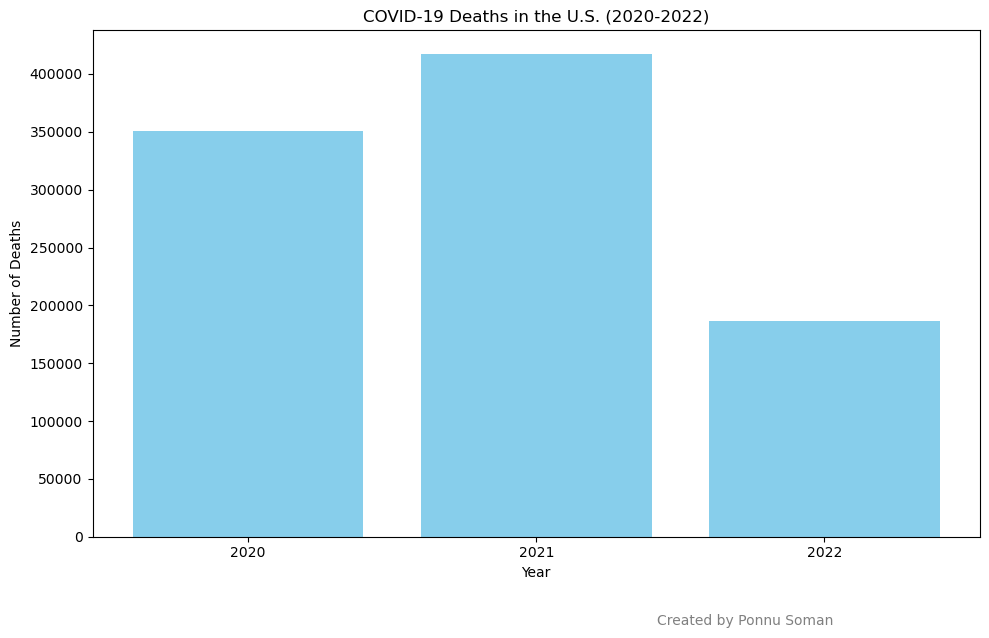

In [5]:
covid = df[df["Cause of death Code"] == "U07.1"]

plt.figure(figsize=(10, 6))

plt.bar(covid["Year"], covid["Deaths"], color="skyblue")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.title("COVID-19 Deaths in the U.S. (2020-2022)")
plt.xticks(covid["Year"])

plt.figtext(
    0.75, -0.05, "Created by Ponnu Soman", ha="center", fontsize=10, color="gray"
)
plt.tight_layout()
plt.show()

/var/folders/_d/ncq1_ycx743dwrbgqss9z7hr0000gn/T/ipykernel_50984/3516656257.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Cause of death Code"] = filtered_df[
/var/folders/_d/ncq1_ycx743dwrbgqss9z7hr0000gn/T/ipykernel_50984/3516656257.py:32: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = filtered_df.pivot_table(


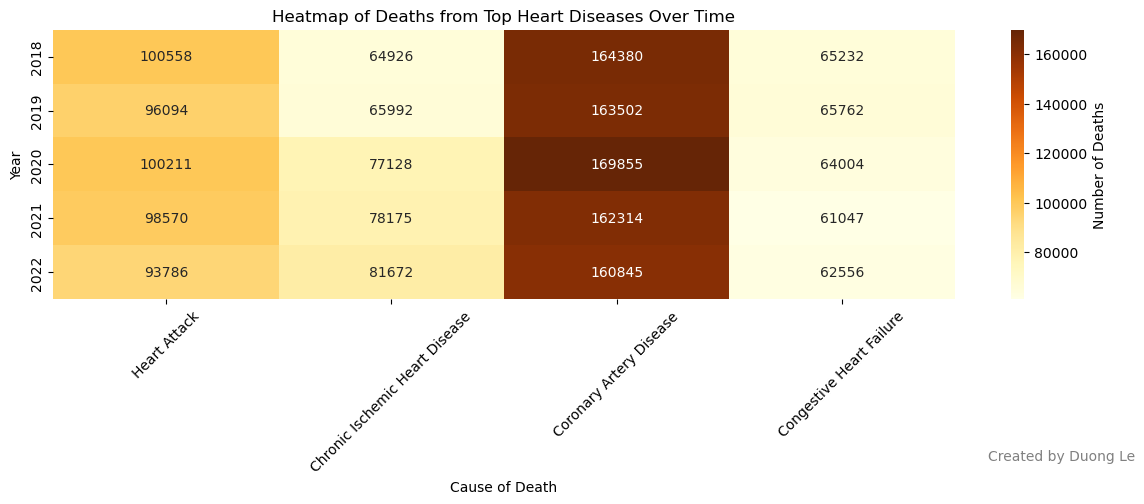

In [6]:
keycodes = r"I00|I01|I02|I03|I04|I05|I06|I07|I08|I09|I11|I13|I20|I21|I22|I23|I24|I25|I26|I27|I28|I29|I30|I31|I32|I33|I34|I35|I36|I37|I38|I39|I40|I41|I42|I43|I44|I45|I46|I47|I48|I49|I50|I51"
selected_diseases = ["I21.9", "I25.1", "I50.0", "I25.0"]
disease_names = [
    "Heart Attack",
    "Coronary Artery Disease",
    "Congestive Heart Failure",
    "Chronic Ischemic Heart Disease",
]  # Corresponding names

heart_df = df[df["Cause of death Code"].str.contains(keycodes, case=False, na=False)]

# Convert to str. In pandas, when a column is set as a category type,
#   it will store and maintain all of the categories available at that time in memory.
# No changes will happen automatically. New categories must be added or removed explicitly.
# Though filtered_df will only SHOW the 4 categories we selected, operations involving that column
#   like pivot_table() will use all 2,381 categories in memory -> pivot_data will have a shape of (5, 2381)
#   -> causing the code to fail
# To remove unused categories, use <column>.cat.remove_unused_categories()
# To add new categories, use <column>.cat.add_categories(['Category_Name'])
# This is done by pandas to strengthen data integrity and improve performance.

# Alternatively, convert everything back to strings:
# heart_df["Cause of death Code"] = heart_df["Cause of death Code"].astype(str)
#   OR
# filtered_df["Cause of death Code"] = filtered_df["Cause of death Code"].astype(str)

filtered_df = heart_df[heart_df["Cause of death Code"].isin(selected_diseases)]
filtered_df["Cause of death Code"] = filtered_df[
    "Cause of death Code"
].cat.remove_unused_categories()

pivot_data = filtered_df.pivot_table(
    index="Year",
    columns="Cause of death Code",
    values="Deaths",
    aggfunc="sum",
).astype("int32")

disease_mapping = dict(zip(selected_diseases, disease_names))
pivot_data.columns = [disease_mapping[col] for col in pivot_data.columns]

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_data,
    cmap="YlOrBr",
    annot=True,
    fmt="d",
    cbar_kws={"label": "Number of Deaths"},
)
plt.title("Heatmap of Deaths from Top Heart Diseases Over Time")
plt.xlabel("Cause of Death")
plt.ylabel("Year")
plt.text(
    1.2,
    -0.60,
    "Created by Duong Le",
    fontsize=10,
    color="Gray",
    ha="right",
    transform=plt.gca().transAxes,
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()